In [1]:
pip install easyocr


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import easyocr

In [83]:
reader = easyocr.Reader(['ch_sim','en'])
image_path = "C:\\GD\\Notes\\DS Class\\DTM15\\Project\\Guvi project\\3 BizCardX Extracting Business Card Data with OCR\\Business Cards\\1.png"
result = reader.readtext(image_path)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[47, 113], [156, 113], [156, 157], [47, 157]], 'Selva', 0.9265680412264737),
 ([[52, 158], [278, 158], [278, 190], [52, 190]],
  'DATA MANAGER',
  0.7993191510553018),
 ([[120, 224], [333, 224], [333, 254], [120, 254]],
  '+123-456-7890',
  0.8063013113640762),
 ([[120, 262], [330, 262], [330, 294], [120, 294]],
  '+123-456-7891',
  0.9557208055039217),
 ([[120, 318], [340, 318], [340, 350], [120, 350]],
  'WWW.XYZI.com',
  0.6485895703953114),
 ([[119, 355], [359, 355], [359, 391], [119, 391]],
  'hello@XYZI.com',
  0.6777211479626964),
 ([[121, 410], [411, 410], [411, 447], [121, 447]],
  '123 ABC St Chennai,',
  0.5171058515081887),
 ([[725, 388], [908, 388], [908, 463], [725, 463]],
  'SelVa',
  0.5900330111506813),
 ([[119, 445], [379, 445], [379, 481], [119, 481]],
  'TamilNadu 600113',
  0.9974765779987506),
 ([[694, 477], [942, 477], [942, 565], [694, 565]],
  'digitals',
  0.9828052336853367)]

In [84]:
import easyocr

reader = easyocr.Reader(['en'], gpu=False)
image_path = "C:\\GD\\Notes\\DS Class\\DTM15\\Project\\Guvi project\\3 BizCardX Extracting Business Card Data with OCR\\Business Cards\\1.png"
image_data = reader.readtext(image_path, detail = 0)
image_data

Using CPU. Note: This module is much faster with a GPU.


['Selva',
 'DATA MANAGER',
 '+123-456-7890',
 '+123-456-7891',
 'WWW XYZI.com',
 'hello@XYZ1.com',
 '123 ABC St , Chennai;',
 'selva',
 'TamilNadu 600113',
 'digitals']

In [15]:
from PIL import Image
import io

In [19]:
# Load the image
image = Image.open(image_path)
# Convert RGBA image to RGB
image = image.convert('RGB')

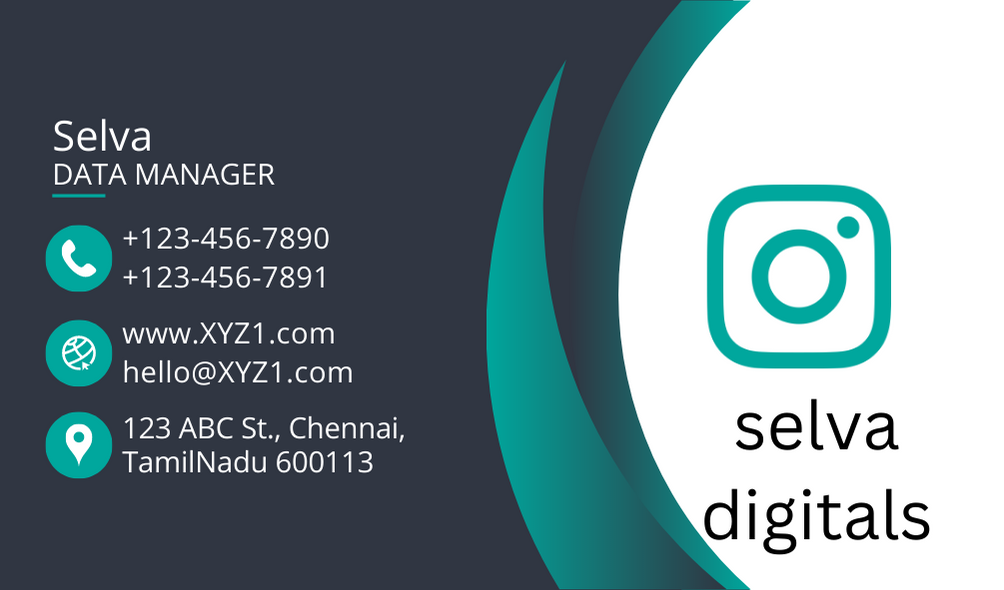

In [63]:
image

In [20]:
# Convert the image to binary data
def img_to_binary(image):
    image_binary = io.BytesIO()
    image.save(image_binary, format='JPEG')
    image_binary = image_binary.getvalue()
    return image_binary

In [44]:
data = {"company_name" : [],
        "card_holder" : [],
        "designation" : [],
        "mobile_number" :[],
        "email" : [],
        "website" : [],
        "area" : [],
        "city" : [],
        "state" : [],
        "pin_code" : [],
        "image" : img_to_binary(image)
        }

In [64]:
import re

def extracted_text(result):
    ext_dic = {'Name': [], 'Designation': [], 'Company name': [], 'Contact': [], 'Email': [], 'Website': [],
               'Address': [], 'Pincode': []}
    
    ext_dic['Name'].append(result[0])
    ext_dic['Designation'].append(result[1])

    for text in result:
        if text.startswith('+') or ('-' in text and text.replace('-', '').isdigit()):
            ext_dic['Contact'].append(text)
        elif '@' in text and '.com' in text:
            ext_dic['Email'].append(text.lower())
        elif 'www' in text.lower():
            ext_dic['Website'].append(text.lower())
        elif 'tamilnadu' in text.lower() or text.isdigit():
            ext_dic['Pincode'].append(text)
        elif re.match(r'^[A-Za-z]', text):
            ext_dic['Company name'].append(text)
        else:
            removed_colon = re.sub(r'[,;]', '', text)
            ext_dic['Address'].append(removed_colon)

    for key, value in ext_dic.items():
        ext_dic[key] = [' '.join(value)] if value else ['NA']

    return ext_dic


In [66]:
data = extracted_text(image_data)
data

{'Name': ['Selva'],
 'Designation': ['DATA MANAGER'],
 'Company name': ['Selva DATA MANAGER selva digitals'],
 'Contact': ['+123-456-7890 +123-456-7891'],
 'Email': ['hello@xyz1.com'],
 'Website': ['www xyzi.com'],
 'Address': ['123 ABC St  Chennai'],
 'Pincode': ['TamilNadu 600113']}

In [69]:
import re

def extracted_text(result):
    ext_dic = {"company_name" : [], "card_holder" : [], "designation" : [], "mobile_number" :[], "email" : [], "website" : [],
        "area" : [], "city" : [], "state" : [], "pin_code" : [],  "image" : img_to_binary(image)  }
    
    ext_dic['card_holder'].append(result[0])
    ext_dic['designation'].append(result[1])

    for text in result:
        if text.startswith('+') or ('-' in text and text.replace('-', '').isdigit()):
            ext_dic['mobile_number'].append(text)
        elif '@' in text and '.com' in text:
            ext_dic['email'].append(text.lower())
        elif 'www' in text.lower():
            ext_dic['website'].append(text.lower())
        elif re.match(r'^[A-Za-z]', text):
            ext_dic['company_name'].append(text)
            
        # Extract area, city, state, and pincode
        elif match := re.match(r'(\d+ [A-Za-z]+ [A-Za-z]+)., ([a-zA-Z]+). ([a-zA-Z]+)', text):
            ext_dic['area'].extend([match.group(1), match.group(2)])
            ext_dic['city'].append(match.group(3))
        elif match := re.match(r'(\d+ [A-Za-z]+ [A-Za-z]+)., ([a-zA-Z]+)', text):
            ext_dic['area'].append(match.group(1))
            ext_dic['city'].append(match.group(2))
        elif match := re.match(r'^[E].+[a-z]', text):
            ext_dic['city'].append(match.group())
        elif match := re.match(r'([A-Za-z]+) ([0-9]+)', text):
            ext_dic['state'].append(match[0][0])
            ext_dic['pin_code'].append(match[0][1])
        elif match := re.match(r'(\d+ [a-zA-z]+)', text):
            ext_dic['area'].append(match.group() + ' St,')
        elif match := re.match(r'([0-9]+)', text):
            ext_dic['pin_code'].append(match[1])

    for key, value in ext_dic.items():
        ext_dic[key] = [' '.join(map(str, value))] if value else ['NA']

    return ext_dic


In [70]:
data = extracted_text(image_data)
data

{'company_name': ['Selva DATA MANAGER selva TamilNadu 600113 digitals'],
 'card_holder': ['Selva'],
 'designation': ['DATA MANAGER'],
 'mobile_number': ['+123-456-7890 +123-456-7891'],
 'email': ['hello@xyz1.com'],
 'website': ['www xyzi.com'],
 'area': ['123 ABC St'],
 'city': ['Chennai'],
 'state': ['NA'],
 'pin_code': ['NA'],
 'image': ['255 216 255 224 0 16 74 70 73 70 0 1 1 0 0 1 0 1 0 0 255 219 0 67 0 8 6 6 7 6 5 8 7 7 7 9 9 8 10 12 20 13 12 11 11 12 25 18 19 15 20 29 26 31 30 29 26 28 28 32 36 46 39 32 34 44 35 28 28 40 55 41 44 48 49 52 52 52 31 39 57 61 56 50 60 46 51 52 50 255 219 0 67 1 9 9 9 12 11 12 24 13 13 24 50 33 28 33 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 255 192 0 17 8 2 78 3 236 3 1 34 0 2 17 1 3 17 1 255 196 0 31 0 0 1 5 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 255 196 0 181 16 0 2 1 3 3 2 4 3 5 5 4 4 0 0 1 125 1 2 3 0 4 17 5 18 33 49 65 6 19 8

In [89]:
details =[]
for i in range(len(result)):
    details.append(result[i][1])
name = []
designation = []
contact =[]
email =[]
website = []
street =[]
city =[]
state =[]
pincode=[]
company =[]

In [79]:
details

['Selva',
 'DATA MANAGER',
 '+123-456-7890',
 '+123-456-7891',
 'WWW XYZI.com',
 'hello@XYZ1.com',
 '123 ABC St , Chennai;',
 'selva',
 'TamilNadu 600113',
 'digitals']

In [85]:
image_data

['Selva',
 'DATA MANAGER',
 '+123-456-7890',
 '+123-456-7891',
 'WWW XYZI.com',
 'hello@XYZ1.com',
 '123 ABC St , Chennai;',
 'selva',
 'TamilNadu 600113',
 'digitals']

In [105]:
def extracted_text(details):
    data = {
        "name": [],
        "designation": [],
        "contact": [],
        "email": [],
        "website": [],
        "street": [],
        "city": [],
        "state": [],
        "pincode": [],
        "company": []
    }
    
    for i in range(len(details)):
        match1 = re.findall('([0-9]+ [A-Z]+ [A-Za-z]+)., ([a-zA-Z]+). ([a-zA-Z]+)', details[i])
        match2 = re.findall('([0-9]+ [A-Z]+ [A-Za-z]+)., ([a-zA-Z]+)', details[i])
        match3 = re.findall('^[E].+[a-z]', details[i])
        match4 = re.findall('([A-Za-z]+) ([0-9]+)', details[i])
        match5 = re.findall('([0-9]+ [a-zA-z]+)', details[i])
        match6 = re.findall('.com$', details[i])
        match7 = re.findall('([0-9]+)', details[i])
        if i == 0:
            data["name"].append(details[i])
        elif i == 1:
            data["designation"].append(details[i])
        elif '-' in details[i]:
            data["contact"].append(details[i])
        elif '@' in details[i]:
            data["email"].append(details[i])
        elif "www " in details[i].lower() or "www." in details[i].lower():
            data["website"].append(details[i])
        elif "WWW" in details[i]:
            data["website"].append(details[i] + "." + details[i+1])
        elif match6:
            pass
        elif match1:
            data["street"].append(match1[0][0])
            data["city"].append(match1[0][1])
            data["state"].append(match1[0][2])
        elif match2:
            data["street"].append(match2[0][0])
            data["city"].append(match2[0][1])
        elif match3:
            data["city"].append(match3[0])
        elif match4:
            data["state"].append(match4[0][0])
            data["pincode"].append(match4[0][1])
        elif match5:
            data["street"].append(match5[0] + ' St,')
        elif match7:
            data["pincode"].append(match7[0])
        else:
            data["company"].append(details[i])
    
    data["contact"] = [" & ".join(data["contact"])]
    # Join company names with comma and space
    data["company"] = [" ".join(data["company"])]
    return data


In [106]:
data = extracted_text(image_data)
data

{'name': ['Selva'],
 'designation': ['DATA MANAGER'],
 'contact': ['+123-456-7890 & +123-456-7891'],
 'email': ['hello@XYZ1.com'],
 'website': ['WWW XYZI.com'],
 'street': ['123 ABC St'],
 'city': ['Chennai'],
 'state': ['TamilNadu'],
 'pincode': ['600113'],
 'company': ['selva digitals']}

In [107]:
import pandas as pd
df = pd.DataFrame(data)
df

,name,designation,contact,email,website,street,city,state,pincode,company
0,Selva,DATA MANAGER,+123-456-7890 & +123-456-7891,hello@XYZ1.com,WWW XYZI.com,123 ABC St,Chennai,TamilNadu,600113,selva digitals
